# ATT spam détection
# Modèle 2b : Transfert Leraning - Modèle BERT non figé (ré-entrainé)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import keras_nlp
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("./data/spam.csv", encoding="cp1252")

print(df.shape)
display(df.head())

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(columns="Unnamed: 2", inplace=True)
df.drop(columns="Unnamed: 3", inplace=True)
df.drop(columns="Unnamed: 4", inplace=True)

df.drop_duplicates(inplace=True)

df.rename(columns={"v1": "sms_class"}, inplace=True)
df.rename(columns={"v2": "sms_brut"}, inplace=True)

df["sms_class"] = df["sms_class"].map({"ham":0,"spam":1})

print(df.shape)
display(df.head())

(5169, 2)


,sms_class,sms_brut
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = df['sms_brut']
y = df['sms_class']
X_train, X_test , y_train, y_test = train_test_split(X, y , stratify = df["sms_class"], random_state = 42)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [ ]:
model_name = "bert_tiny_en_uncased_sst2"

classifier = keras_nlp.models.BertClassifier.from_preset(
    model_name,
    num_classes=2,
    load_weights = True,
    activation='sigmoid'
)

In [ ]:
classifier.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    jit_compile=True,
     metrics=[tf.keras.metrics.Recall(name="recall"), tf.keras.metrics.Precision(name="precision"), "accuracy"],
)
# rendre les dernière couche de BERT entrainable (True)
# Figer les dernières couches (Flase)
classifier.backbone.trainable = True

In [27]:
history = classifier.fit(x=X_train, y=y_train, epochs = 50, validation_data=(X_test,y_test), batch_size=32)

Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 370s 3s/step - accuracy: 0.9233 - loss: 0.2775 - precision: 0.9273 - recall: 0.8978 - val_accuracy: 0.9613 - val_loss: 0.1351 - val_precision: 0.9614 - val_recall: 0.9621
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 394s 3s/step - accuracy: 0.9756 - loss: 0.0817 - precision: 0.9756 - recall: 0.9756 - val_accuracy: 0.9613 - val_loss: 0.0800 - val_precision: 0.9599 - val_recall: 0.9621
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 366s 3s/step - accuracy: 0.9806 - loss: 0.0592 - precision: 0.9806 - recall: 0.9806 - val_accuracy: 0.9838 - val_loss: 0.0790 - val_precision: 0.9838 - val_recall: 0.9845
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 360s 3s/step - accuracy: 0.9932 - loss: 0.0370 - precision: 0.9932 - recall: 0.9932 - val_accuracy: 0.9265 - val_loss: 0.1951 - val_precision: 0.9258 - val_recall: 0.9265
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 361s 3s/step - accuracy: 0.9761 - loss: 0.0815 - precision: 0.9751 - recall: 0.9761 - val_accuracy: 0.9822 - val_los

In [28]:
classifier.evaluate(X_test, y_test,batch_size=32)

41/41 ━━━━━━━━━━━━━━━━━━━━ 26s 620ms/step - accuracy: 0.9831 - loss: 0.0974 - precision: 0.9831 - recall: 0.9831


[0.09502366930246353,
 0.9829853177070618,
 0.9829853177070618,
 0.9829853177070618]

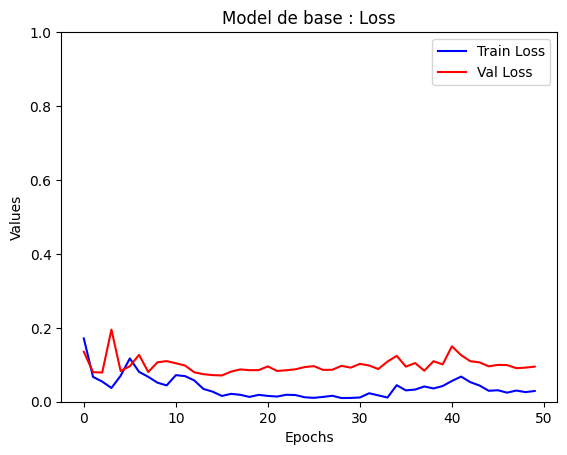

In [29]:
plt.plot(history.history["loss"], color="b", label="Train Loss")
plt.plot(history.history["val_loss"], color="r", label="Val Loss")
plt.ylabel("Values")
plt.xlabel("Epochs")
plt.title("Model de base : Loss")
plt.legend()
plt.ylim(0,1)
plt.show()

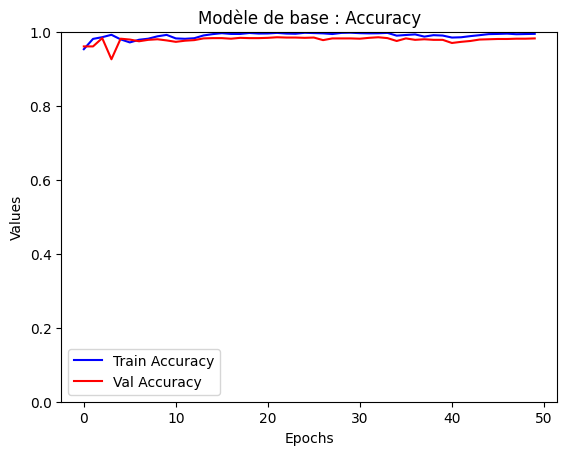

In [30]:
plt.plot(history.history["accuracy"], color="b", label="Train Accuracy")
plt.plot(history.history["val_accuracy"], color="r", label="Val Accuracy")
plt.ylabel("Values")
plt.xlabel("Epochs")
plt.title("Modèle de base : Accuracy")
plt.legend()
plt.ylim(0,1)
plt.show()

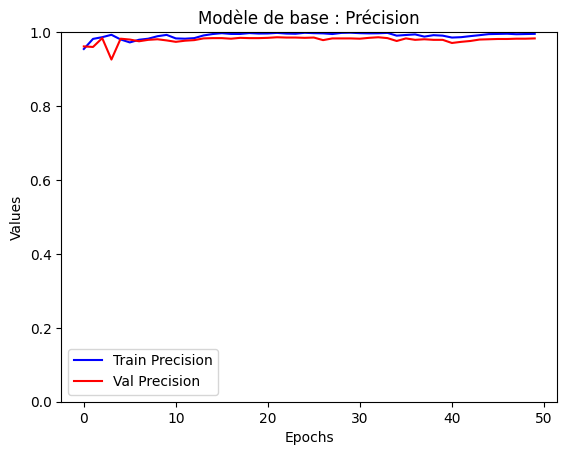

In [31]:
plt.plot(history.history["precision"], color="b", label="Train Precision")
plt.plot(history.history["val_precision"], color="r", label="Val Precision")
plt.ylabel("Values")
plt.xlabel("Epochs")
plt.title("Modèle de base : Précision")
plt.legend()
plt.ylim(0,1)
plt.show()

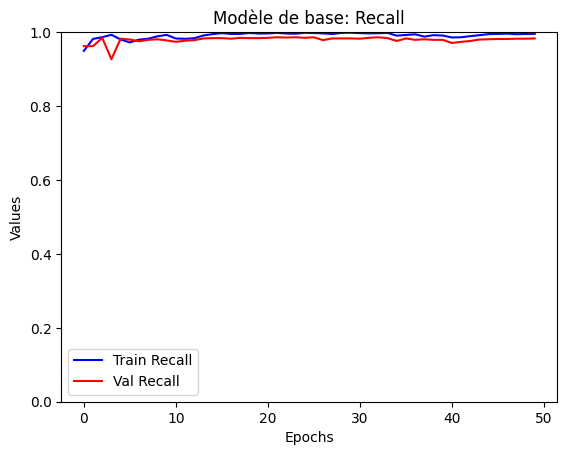

In [32]:
plt.plot(history.history["recall"], color="b", label="Train Recall")
plt.plot(history.history["val_recall"], color="r", label="Val Recall")
plt.ylabel("Values")
plt.xlabel("Epochs")
plt.title("Modèle de base: Recall")
plt.legend()
plt.ylim(0,1)
plt.show()

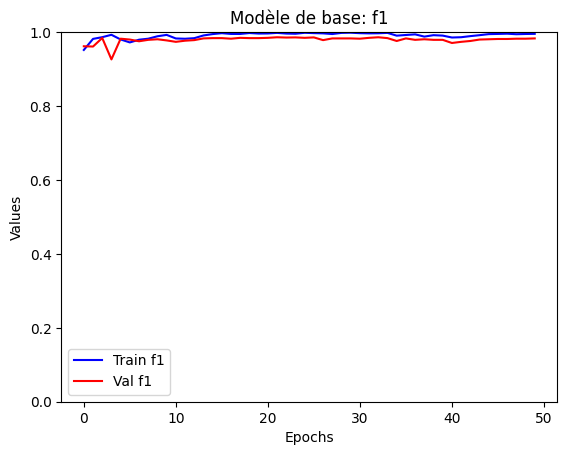

In [33]:
recall = history.history["recall"]
precision = history.history["precision"]

f1 = pd.DataFrame()
f1["f1"] =  2*np.array(recall)*np.array(precision)/(np.array(recall)+np.array(precision)+tf.keras.backend.epsilon())

val_recall = history.history["val_recall"]
val_precision = history.history["val_precision"]

val_f1 = pd.DataFrame()
val_f1["val_f1"] =  2*np.array(val_recall)*np.array(val_precision)/(np.array(val_recall)+np.array(val_precision)+0.00000001)

plt.plot(f1["f1"], color="b", label="Train f1")
plt.plot(val_f1["val_f1"], color="r", label="Val f1")
plt.ylabel("Values")
plt.xlabel("Epochs")
plt.title("Modèle de base: f1")
plt.legend()
plt.ylim(0,1)
plt.show()

In [34]:
print("**Train :")
print("Loss :", list(history.history["loss"])[-1])
print("Accuracy :", list(history.history["accuracy"])[-1])
print("precision :", list(history.history["precision"])[-1])
print("Recall :", list(history.history["recall"])[-1])
print("f1 :", list(f1["f1"])[-1])
print()
print("**Test :")
print("Loss :", list(history.history["val_loss"])[-1])
print("Accuracy :", list(history.history["val_accuracy"])[-1])
print("precision :", list(history.history["val_precision"])[-1])
print("Recall :", list(history.history["val_recall"])[-1])
print("f1 :", list(val_f1["val_f1"])[-1])

**Train :
Loss : 0.029009081423282623
Accuracy : 0.995356023311615
precision : 0.995356023311615
Recall : 0.995356023311615
f1 : 0.9953559733116175

**Test :
Loss : 0.09502366930246353
Accuracy : 0.9829853177070618
precision : 0.9829853177070618
Recall : 0.9829853177070618
f1 : 0.9829853127070618


In [35]:
history.history

{'accuracy': [0.9538183808326721,
  0.9816821217536926,
  0.9863260984420776,
  0.9927760362625122,
  0.9803921580314636,
  0.9721361994743347,
  0.9793601632118225,
  0.9821981191635132,
  0.9886481165885925,
  0.9925180673599243,
  0.9829721450805664,
  0.9819401502609253,
  0.983488142490387,
  0.9909700751304626,
  0.9945820569992065,
  0.9971620440483093,
  0.9950980544090271,
  0.9950980544090271,
  0.9976780414581299,
  0.9961300492286682,
  0.9963880181312561,
  0.9979360103607178,
  0.9961300492286682,
  0.9956140518188477,
  0.9981940388679504,
  0.9974200129508972,
  0.9966460466384888,
  0.9948400259017944,
  0.9979360103607178,
  0.9984520077705383,
  0.9971620440483093,
  0.9966460466384888,
  0.9969040155410767,
  0.9979360103607178,
  0.9904540777206421,
  0.9922600388526917,
  0.9938080310821533,
  0.9878740906715393,
  0.9917440414428711,
  0.99071204662323,
  0.9852941036224365,
  0.9860681295394897,
  0.9891641139984131,
  0.9917440414428711,
  0.9945820569992065,
 

In [36]:
classifier.summary()

Preprocessor: "bert_preprocessor_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                                │                       Vocab size: 30,522 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "bert_classifier_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ segment_ids (InputLayer)      │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bert_backbone (BertBackbone)  │ [(None, 128), (None,      │       4,385,920 │ padding_mask[0][0],        │
│                               │ None, 128)]               │                 │ segment_ids[0][0],         │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ classifier_dropout (Dropout)  │ (None, 128)               │               0 │ bert_backbone[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │             258 │ classifier_dropout[0][0]   │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 13,158,536 (50.20 MB)

 Trainable params: 4,386,178 (16.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,772,358 (33.46 MB)